# Smoothed lasso regression

In [20]:
library(tidyverse)

#install.packages('hablar')
#library(hablar)

#install.packages("tidyr")
#install.packages("rlang")
library(tidyr)

#install.packages('scales')
library(scales)

library(LICORS)

#install.packages("slider")
library(slider)

library(glmnet)

## Reading in the data

In [21]:
sum_control_ATAC_bin_rm = read.csv("sum_control_ATAC_bin_rm.csv")
sum_control_ATAC = read.csv("sum_control_ATAC.csv")

ATAC_val <- sum_control_ATAC_bin_rm %>% select(ATAC_val)

sum_control_ATAC_bin_rm = sum_control_ATAC_bin_rm %>% select(-ATAC_val)

## Sliding mean

In [22]:
sum_control_ATAC_bin_rm_sliding_mean <- matrix(ncol = 671, nrow = 0)

for (row in 1:nrow(sum_control_ATAC_bin_rm)){
    row_cur <- sum_control_ATAC_bin_rm[row, ]
    row_cur <- as.vector(t(row_cur))
    roll_m <- slide_dbl(row_cur, mean, .before = 1, .after = 1)
    sum_control_ATAC_bin_rm_sliding_mean <- rbind(sum_control_ATAC_bin_rm_sliding_mean, roll_m)
}
sum_control_ATAC_bin_rm_sliding_mean <- as.data.frame(sum_control_ATAC_bin_rm_sliding_mean, index = FALSE)
colnames(sum_control_ATAC_bin_rm_sliding_mean) <- colnames(sum_control_ATAC_bin_rm)
rownames(sum_control_ATAC_bin_rm_sliding_mean) <- NULL

head(sum_control_ATAC_bin_rm_sliding_mean)


X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700
2.174912e-06,2.319906e-06,2.029918e-06,1.159953e-06,5.799764e-07,1.159953e-06,1.449941e-06,1.159953e-06,1.449941e-06,1.159953e-06,...,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00
8.313727e-07,5.542485e-07,5.542485e-07,8.313727e-07,1.108497e-06,1.108497e-06,2.494118e-06,3.325491e-06,4.156863e-06,3.602615e-06,...,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00
1.305866e-06,1.160770e-06,1.160770e-06,5.803849e-07,2.901925e-07,8.705774e-07,2.031347e-06,2.031347e-06,1.450962e-06,2.901925e-07,...,0.000000e+00,0,0,0,0,0,0,0,2.901925e-07,4.352887e-07
8.503423e-07,5.668949e-07,8.503423e-07,5.668949e-07,1.133790e-06,1.133790e-06,8.503423e-07,5.668949e-07,5.668949e-07,8.503423e-07,...,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00
4.708289e-07,3.138859e-07,3.138859e-07,3.138859e-07,3.138859e-07,6.277718e-07,3.138859e-07,1.255544e-06,9.416577e-07,1.883315e-06,...,3.138859e-07,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00
0.000000e+00,0.000000e+00,1.407041e-06,1.969857e-06,2.532674e-06,1.407041e-06,8.442245e-07,1.125633e-06,8.442245e-07,1.407041e-06,...,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00


## Saving the data for other the other scripts

In [23]:
write.csv(sum_control_ATAC_bin_rm_sliding_mean, "sum_control_ATAC_bin_rm_sliding_mean_3.csv",  row.names = FALSE)

In [24]:
sum_control_ATAC_bin_rm_sliding_mean <- read.csv("sum_control_ATAC_bin_rm_sliding_mean_3.csv")

## Plot

In [25]:
#chr10_100 <- sum_control_ATAC_bin_rm_sliding_mean %>% slice(1:1)

#chr10_100_long <- chr10_100 %>% pivot_longer(names_to = "bin_size", values_to = "bin_count")
#head(chr10_100_long)

#ggplot(chr10_100_long) + geom_col(aes(x = bin_size, y = bin_count))

## Finding the best lambda

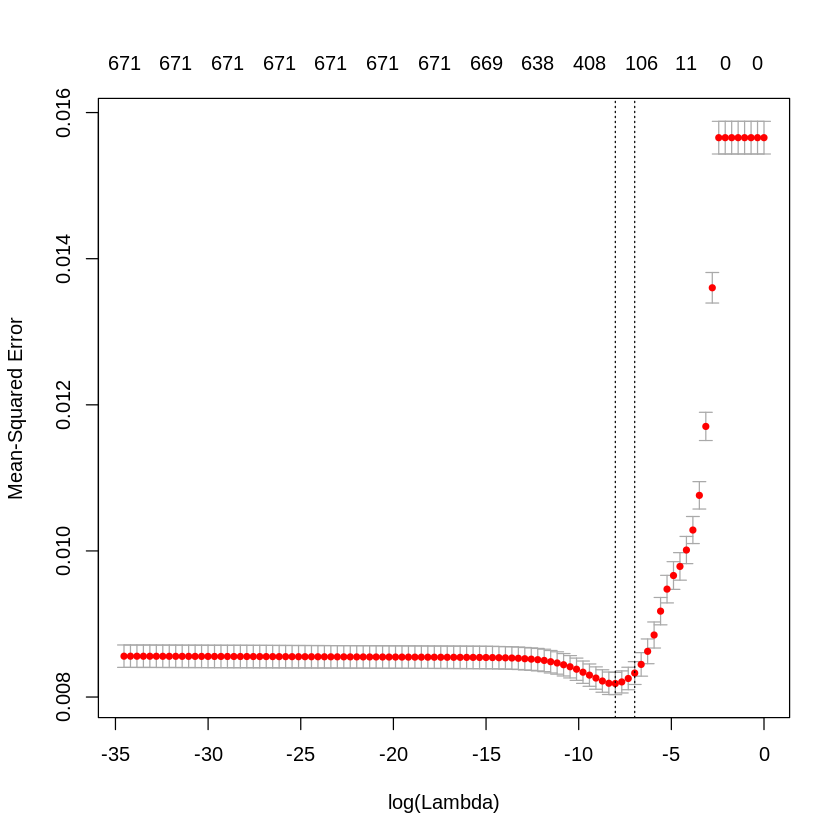

In [33]:
set.seed(0)
#X==predictor
#y==response
#sum_control_ATAC_bin_rm <- sum_control_ATAC  %>% dplyr::select(-bin)



y <- ATAC_val %>%  as.matrix()
X <- sum_control_ATAC_bin_rm_sliding_mean %>% as.matrix()
#head(X)


lambdas_to_try <- 10^seq(-15, 0, length.out = 100)
#standardize = FALSE -- range 15, 0
#standardize = TRUE -- range 


lasso_smooth_cv <- cv.glmnet(X, y, alpha = 1, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 10)

#Plotting the MSE and log(lambda)

plot(lasso_smooth_cv)

In [34]:
head(X)

X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700
2.174912e-06,2.319906e-06,2.029918e-06,1.159953e-06,5.799764e-07,1.159953e-06,1.449941e-06,1.159953e-06,1.449941e-06,1.159953e-06,...,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00
8.313727e-07,5.542485e-07,5.542485e-07,8.313727e-07,1.108497e-06,1.108497e-06,2.494118e-06,3.325491e-06,4.156863e-06,3.602615e-06,...,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00
1.305866e-06,1.160770e-06,1.160770e-06,5.803849e-07,2.901925e-07,8.705774e-07,2.031347e-06,2.031347e-06,1.450962e-06,2.901925e-07,...,0.000000e+00,0,0,0,0,0,0,0,2.901925e-07,4.352887e-07
8.503423e-07,5.668949e-07,8.503423e-07,5.668949e-07,1.133790e-06,1.133790e-06,8.503423e-07,5.668949e-07,5.668949e-07,8.503423e-07,...,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00
4.708289e-07,3.138859e-07,3.138859e-07,3.138859e-07,3.138859e-07,6.277718e-07,3.138859e-07,1.255544e-06,9.416577e-07,1.883315e-06,...,3.138859e-07,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00
0.000000e+00,0.000000e+00,1.407041e-06,1.969857e-06,2.532674e-06,1.407041e-06,8.442245e-07,1.125633e-06,8.442245e-07,1.407041e-06,...,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00


In [35]:
lambda_smooth_cv <- lasso_smooth_cv$lambda.min

In [36]:
CV_lasso_smooth<-function(data, nfolds){
    set.seed(0)
    cvfolds <- cut(1:nrow(data), breaks = nfolds, labels = F)
    cvfolds <- sample(cvfolds)
    

    predicted <- rep(NA, nrow(data))
    #data_as_matrix <- data %>% dplyr::select(-ATAC_val) %>% as.matrix() 
    
    y <- ATAC_val %>%  as.matrix()
    X <- sum_control_ATAC_bin_rm_sliding_mean %>% as.matrix()
    
    for (i in 1:nfolds){
        rows      <- which(cvfolds==i)
        testdata  <- X[rows,]
        traindata <- X[-rows,]
        train_y <- y[-rows,]

        fit       <- glmnet(traindata, train_y, alpha = 1, lambda = lambda_smooth_cv, standardize = TRUE)
        tmp       <- predict(fit, s=lambda_smooth_cv, testdata)
        predicted[rows] <- tmp
    }
    
    rm(tmp)
    observed <- y
    head(observed)
    mean(observed)
    se    <- (observed-predicted)^2
    mse   <- mean(se)
    (rmse <- sqrt(mse))
    
    return(tibble(observed = observed, predicted = predicted))
}

In [37]:
res_lasso_smooth_pred <- CV_lasso_smooth(sum_control_ATAC_bin_rm_sliding_mean, 10)

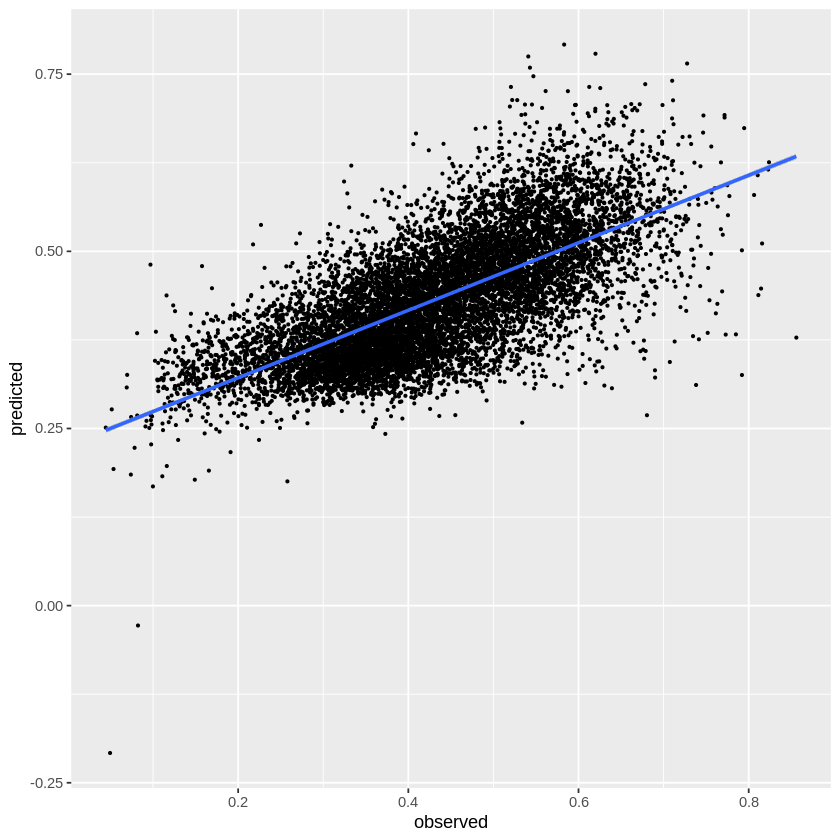

In [38]:
ggplot(res_lasso_smooth_pred, aes(x = observed, y = predicted)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method = "lm", formula = y~x)

In [39]:
cor(res_lasso_smooth_pred$observed, res_lasso_smooth_pred$predicted)

# Standardize = TRUE: ATAC_val 0.6913315
# Standardize = FALSE: ATAC_val 0.6945339

ATAC_val,0.6913315
